In [30]:
import numpy as np
import mne
from matplotlib import pyplot as plt
from scipy.signal import hilbert
from mne.stats import permutation_cluster_test
from statsmodels.stats.multitest import fdrcorrection
from src.utils.logger import create_logger
from src.utils.data import load_yaml
from src.dataset.data_reader import BIDSDatasetReader

In [2]:
hf_band = (70, 150)           # high-frequency / high-gamma band for EMG proxy
baseline = (-0.5, -0.1)       # baseline window in seconds (pre-stim/trial)
analysis_window = (0.0, 0.6)  # analysis window relative to epoch/event
ch_names = ['T7', 'T8', 'FT7', 'FT8']
n_permutations = 1000 

In [3]:
config = 'config.yaml'
config = load_yaml(config)
logger = create_logger('test')


In [4]:
reader = BIDSDatasetReader(
    logger=logger, config=config, subject='01', session='01'
)

[2025-12-01 11:09:53] [INFO] ************************************************************
[2025-12-01 11:09:53] [INFO] **********Initializing BIDSDatasetReader**********
[2025-12-01 11:09:53] [INFO] ************************************************************


In [5]:
reader._load_raw()

[2025-12-01 11:09:54] [INFO] Loading raw EEG data


Reading 0 ... 6306999  =      0.000 ...  6306.999 secs...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:44: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['EOG1', 'EOG2']
  self.raw_eeg = read_raw_bids(self.bidspath, verbose=False)
[2025-12-01 11:10:01] [INFO] Data read sucessfully


In [6]:
eeg = reader.raw_eeg

In [7]:
eeg.annotations[0]

OrderedDict([('onset', np.float64(16.301)),
             ('duration', np.float64(0.0)),
             ('description',
              np.str_('SilentSyllablesPracticeStartFixation:Text_FAS')),
             ('orig_time',
              datetime.datetime(2024, 7, 4, 8, 5, 45, tzinfo=datetime.timezone.utc)),
             ('extras', {})])

In [8]:
from src.dataset.eeg_epoch_builder import EEGEpochBuilder
ch_names = ['T7', 'T8', 'FT7', 'FT8']
baseline={'tmin':-0.2, 'tmax':0.0}

In [39]:
overt = EEGEpochBuilder(
    eeg_data=eeg,
    trial_mode='Real', trial_unit='Words',
    trial_boundary='Start', 
    experiment_mode='Experiment', 
    trial_type='Speech',
    modality='',
    channels=ch_names, logger=logger
)

covert = EEGEpochBuilder(
    eeg_data=eeg,
    trial_mode='Silent', trial_unit='Words',
    trial_boundary='Start', 
    experiment_mode='Experiment', 
    trial_type='Speech',
    modality='',
    channels=ch_names, logger=logger
)

rest = EEGEpochBuilder(
    eeg_data=eeg,
    trial_mode='Real', trial_unit='Words',
    trial_boundary='Start', 
    experiment_mode='Experiment', 
    trial_type='Fixation',
    modality='',
    channels=ch_names, logger=logger
)

[2025-12-01 12:17:13] [INFO] ************************************************************
[2025-12-01 12:17:13] [INFO] **********Initializing Epoch Builder**********
[2025-12-01 12:17:13] [INFO] ************************************************************
[2025-12-01 12:17:13] [INFO] ************************************************************
[2025-12-01 12:17:13] [INFO] **********Initializing Epoch Builder**********
[2025-12-01 12:17:13] [INFO] ************************************************************
[2025-12-01 12:17:13] [INFO] ************************************************************
[2025-12-01 12:17:13] [INFO] **********Initializing Epoch Builder**********
[2025-12-01 12:17:13] [INFO] ************************************************************


In [40]:
overt_epochs = overt.create_epochs(tmin=-0.2, tmax=1.5)
covert_epochs = covert.create_epochs(tmin=-0.2, tmax=1.5)
rest_epochs = rest.create_epochs(tmin=-0.2, tmax=1.5)

[2025-12-01 12:17:14] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Speech     ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 1.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
255 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 255 events and 1701 original time points ...
0 bad epochs dropped


[2025-12-01 12:17:14] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Speech     ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 1.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
255 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 255 events and 1701 original time points ...
0 bad epochs dropped


[2025-12-01 12:17:14] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 1.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
255 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 255 events and 1701 original time points ...
0 bad epochs dropped


In [54]:
hf_band = (60, 170)   
baseline = (-0.5, -0.1)       # baseline window in seconds (pre-stim/trial)
sfreq = covert_epochs.info['sfreq']
analysis_window = (0.0, 0.6)  # analysis window relative to epoch/event

sfreq

1000.0

In [55]:
def bandpass_and_power(epochs, l_freq, h_freq):
    data = epochs.get_data()  # shape (n_epochs, n_channels, n_times)
    # bandpass in-place using MNE filter (zero-phase)
    # MNE filter works on (n_channels, n_times) arrays per epoch; we'll apply across epochs vectorized
    n_epochs, n_ch, n_times = data.shape
    data_reshaped = data.reshape(n_epochs * n_ch, n_times)
    # apply filter
    filt = mne.filter.filter_data(data_reshaped, sfreq=sfreq, l_freq=l_freq, h_freq=h_freq,
                                  verbose=False, method='fir')  # use fir for stability
    filt = filt.reshape(n_epochs, n_ch, n_times)
    # Hilbert -> analytic -> power
    analytic = hilbert(filt, axis=-1)
    power = np.abs(analytic) ** 2
    return power  # shape (n_epochs, n_ch, n_times)

In [56]:
overt_power = bandpass_and_power(overt_epochs, hf_band[0], hf_band[1])
covert_power = bandpass_and_power(covert_epochs, hf_band[0], hf_band[1])
rest_power = bandpass_and_power(rest_epochs, hf_band[0], hf_band[1])

In [57]:
def baseline_zscore(power, times, baseline_window):
    bmin, bmax = baseline_window
    bidx = np.where((times >= bmin) & (times <= bmax))[0]
    if len(bidx) == 0:
        raise ValueError("Baseline window matches no time points.")
    # compute mean/std across baseline samples for each epoch+channel
    baseline_mean = power[:, :, bidx].mean(axis=-1, keepdims=True)  # shape (n_epochs, n_ch, 1)
    baseline_std  = power[:, :, bidx].std(axis=-1, keepdims=True)   # shape (n_epochs, n_ch, 1)
    # avoid divide by zero
    baseline_std[baseline_std == 0] = 1e-12
    z = (power - baseline_mean) / baseline_std
    return z

In [58]:
overt_epochs.info['sfreq']

1000.0

In [59]:
times = overt_epochs.times
overt_power.shape

(255, 4, 1701)

In [60]:
overt_z = baseline_zscore(overt_power, times, baseline)
covert_z = baseline_zscore(covert_power, times, baseline)
rest_z = baseline_zscore(rest_power, times, baseline)


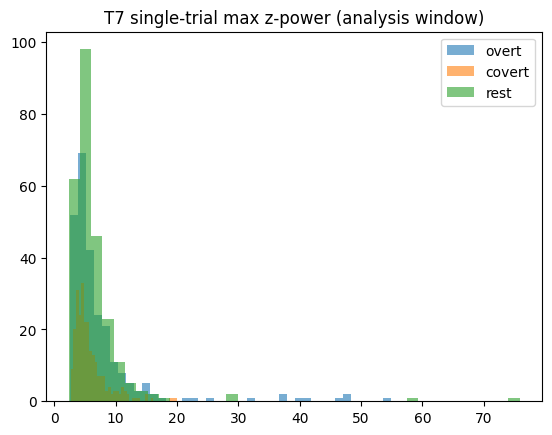

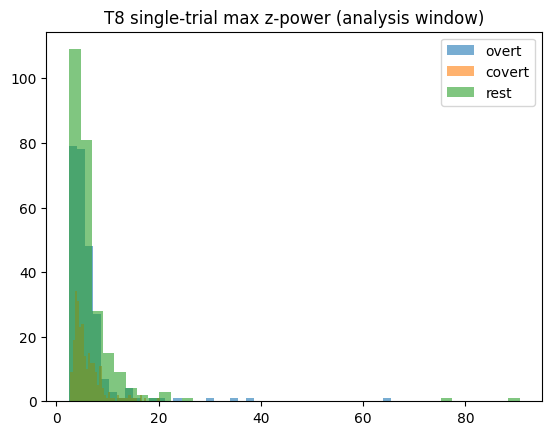

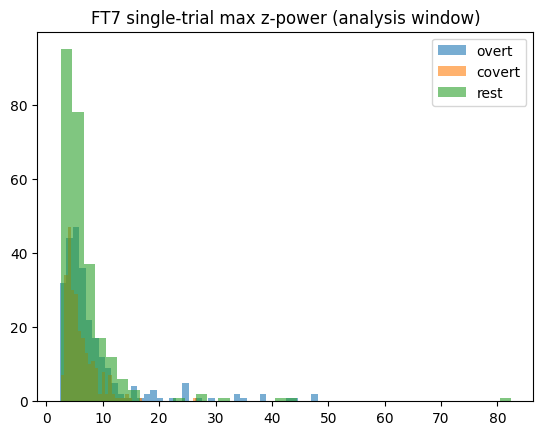

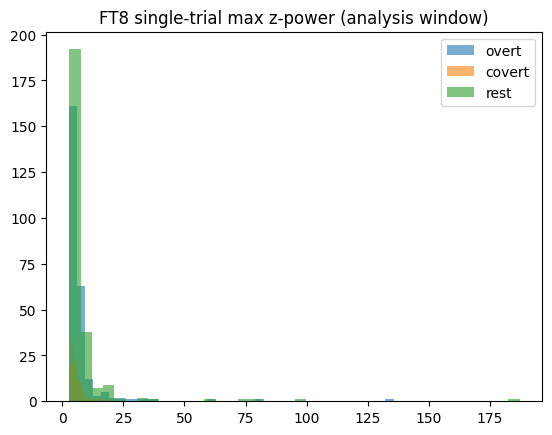

In [61]:
overt_max = overt_z[:, :,].max(axis=-1)  # (n_overt, n_ch)
covert_max = covert_z[:, :, ].max(axis=-1)  
rest_max = rest_z[:, :, ].max(axis=-1)
for ch_idx, ch in enumerate(ch_names):
    plt.figure()
    plt.hist(overt_max[:, ch_idx], bins=40, alpha=0.6, label='overt')
    plt.hist(covert_max[:, ch_idx], bins=40, alpha=0.6, label='covert')
    plt.hist(rest_max[:, ch_idx], bins=40, alpha=0.6, label='rest')
    plt.title(f'{ch} single-trial max z-power (analysis window)')
    plt.legend()

In [22]:
aidx = np.where((times >= analysis_window[0]) & (times <= analysis_window[1]))[0]
times_a = times[aidx]

In [23]:
results = {}
for ch_idx, ch in enumerate(ch_names):
    X = [overt_z[:, ch_idx, aidx], covert_z[:, ch_idx, aidx]]  # list of arrays (n_epochs, n_times)
    # permutation_cluster_test expects (samples, times) arrays; we give them as the two-group list
    T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
        X, n_permutations=n_permutations, tail=0, n_jobs=1, seed=42, out_type='mask'
    )
    results[ch] = dict(
        T_obs=T_obs,
        clusters=clusters,
        cluster_p_values=cluster_p_values
    )


Using a threshold of 3.859829
stat_fun(H1): min=8.113064830878866e-07 max=8.067398934602743
Running initial clustering …
Found 12 clusters


/tmp/ipykernel_498609/3658073049.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
/home/owaismujtaba/anaconda3/envs/mind/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Permuting : 999/999 [00:00<00:00, 2272.76it/s]

Using a threshold of 3.859829
stat_fun(H1): min=1.962304999623267e-05 max=12.960383807781499
Running initial clustering …
Found 19 clusters



/tmp/ipykernel_498609/3658073049.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
100%|██████████| Permuting : 999/999 [00:00<00:00, 2327.40it/s]


Using a threshold of 3.859829
stat_fun(H1): min=4.2624193248361876e-07 max=8.474889246675879
Running initial clustering …
Found 7 clusters


/tmp/ipykernel_498609/3658073049.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
100%|██████████| Permuting : 999/999 [00:00<00:00, 2488.97it/s]


Using a threshold of 3.859829
stat_fun(H1): min=1.6058477884695028e-06 max=16.986214676714052
Running initial clustering …
Found 7 clusters


/tmp/ipykernel_498609/3658073049.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
100%|██████████| Permuting : 999/999 [00:00<00:00, 2527.39it/s]


In [24]:
# Report significant clusters (p < 0.05) per channel
for ch in ch_names:
    sigs = [(cl, p) for cl, p in zip(results[ch]['clusters'], results[ch]['cluster_p_values']) if p <= 0.05]
    print(f"Channel {ch}: {len(sigs)} significant cluster(s).")
    for cl_mask, p in sigs:
        t_inds = np.where(cl_mask)[0]
        print(f"  p={p:.3f}, time range {times_a[t_inds[0]]:.3f} - {times_a[t_inds[-1]]:.3f} s")


Channel T7: 0 significant cluster(s).
Channel T8: 2 significant cluster(s).
  p=0.035, time range 0.000 - 0.000 s
  p=0.001, time range 0.000 - 0.000 s
Channel FT7: 0 significant cluster(s).
Channel FT8: 1 significant cluster(s).
  p=0.014, time range 0.000 - 0.000 s


In [23]:
# --- 4) Multiple-comparison across channels (optional): FDR on min p per channel ---
min_ps = [np.min(results[ch]['cluster_p_values']) if len(results[ch]['cluster_p_values'])>0 else 1.0 for ch in ch_names]
rej, pvals_corrected = fdrcorrection(min_ps, alpha=0.05)
for ch, r, p in zip(ch_names, rej, pvals_corrected):
    print(f"FDR corrected significant cluster on {ch}: {r}, corrected p={p:.3f}")

FDR corrected significant cluster on T7: False, corrected p=0.441
FDR corrected significant cluster on T8: True, corrected p=0.004
FDR corrected significant cluster on FT7: False, corrected p=0.436
FDR corrected significant cluster on FT8: True, corrected p=0.028


In [26]:
from matplotlib import pyplot as plt

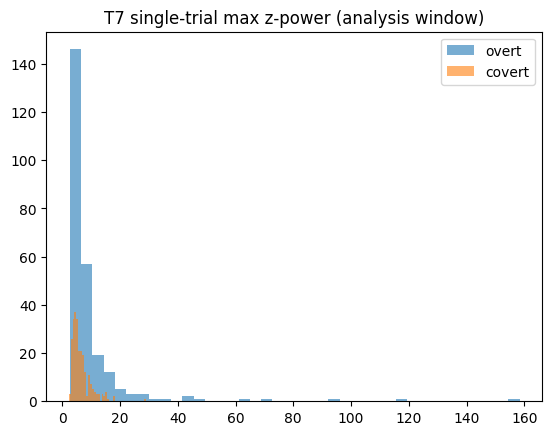

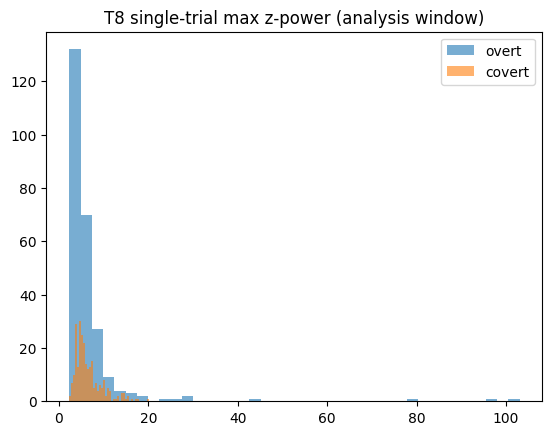

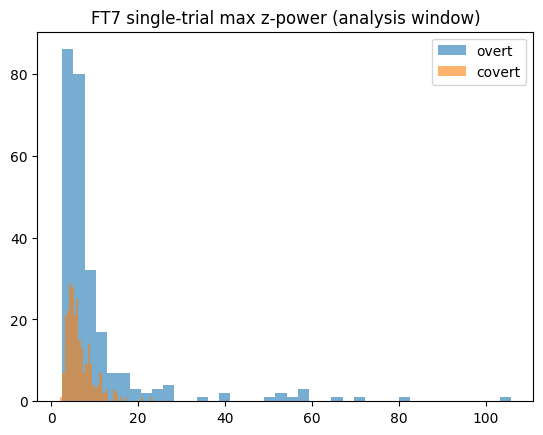

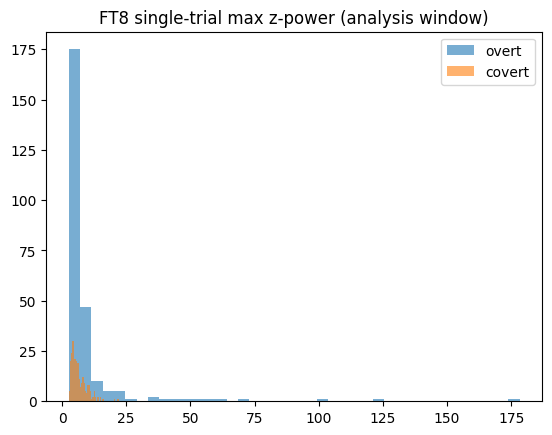